Importing the Data and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score

In [2]:
testing = pd.read_csv('data/Test data.csv')
training = pd.read_csv('data/Training data.csv')
target = pd.read_csv('data/Training data target.csv')

In [3]:
testing.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2/4/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other


In [4]:
training.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
target.head(1)

,id,status_group
0,69572,functional


Here I begin analyzing the columns in the dataset that I was assigned:

In [6]:
df= training[['basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   basin           59400 non-null  object
 1   subvillage      59029 non-null  object
 2   region          59400 non-null  object
 3   region_code     59400 non-null  int64 
 4   district_code   59400 non-null  int64 
 5   lga             59400 non-null  object
 6   ward            59400 non-null  object
 7   population      59400 non-null  int64 
 8   public_meeting  56066 non-null  object
 9   recorded_by     59400 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.5+ MB


<AxesSubplot:xlabel='basin', ylabel='count'>

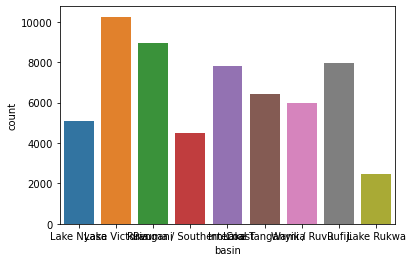

In [7]:
df['basin'].value_counts()
sns.countplot(x=df['basin'])

<AxesSubplot:xlabel='subvillage', ylabel='population'>

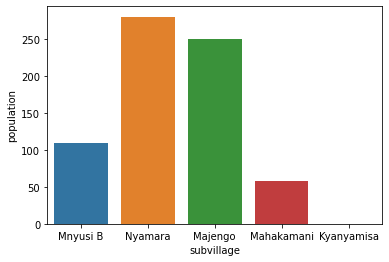

In [8]:
df['subvillage'].value_counts()
sns.barplot(x=df['subvillage'][:5], y=df['population'])

<AxesSubplot:xlabel='region', ylabel='count'>

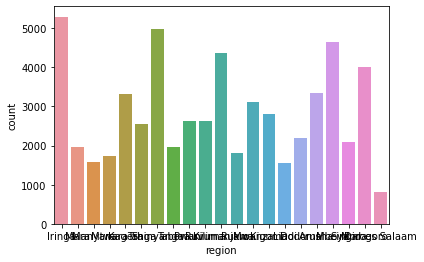

In [9]:
df['region'].value_counts()
sns.countplot(x=df['region'])

<AxesSubplot:xlabel='region_code', ylabel='count'>

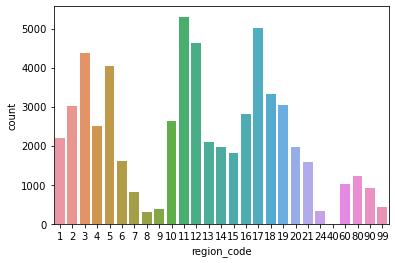

In [10]:
df['region_code'].value_counts()
sns.countplot(x=df['region_code'])

<AxesSubplot:xlabel='district_code', ylabel='count'>

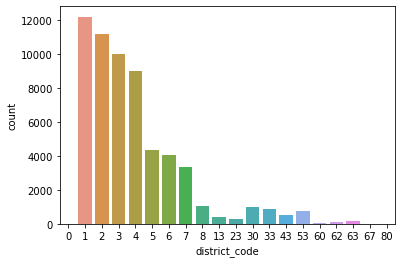

In [11]:
df['district_code'].value_counts()
sns.countplot(x=df['district_code'])

<AxesSubplot:xlabel='lga'>

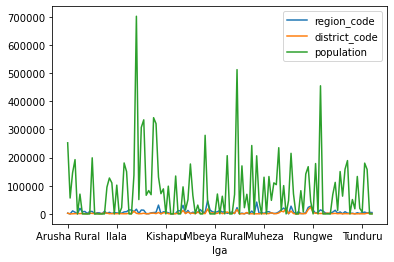

In [22]:
#df['lga'].value_counts()
df.groupby(['lga']).sum().plot()

<AxesSubplot:xlabel='ward'>

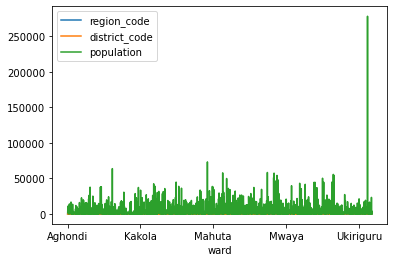

In [21]:
#df['ward'].value_counts()
#df_ward = df.groupby(['ward']).count()
df.groupby(['ward']).sum().plot()

<AxesSubplot:xlabel='population'>

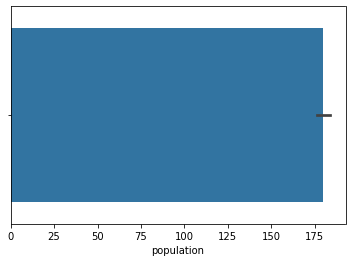

In [ ]:
df['population'].value_counts()
sns.barplot(x=df['population'])

<AxesSubplot:xlabel='public_meeting', ylabel='count'>

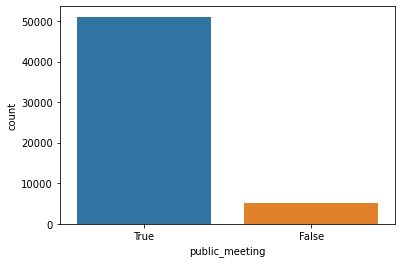

In [ ]:
df['public_meeting'].value_counts()
sns.countplot(x=df['public_meeting'])

<AxesSubplot:xlabel='recorded_by', ylabel='count'>

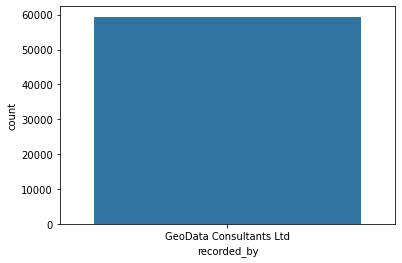

In [ ]:
df['recorded_by'].value_counts()
sns.countplot(x=df['recorded_by'])

Now moving on to adding some visuals and training a model. 

In [ ]:
#sns.scatter(pd.concat([training, target], axis=1), y_vars=['status_group'])

In [ ]:
X = training.drop(columns=['id', 'date_recorded', 'longitude', 'latitude', 'recorded_by'], axis= 1)

In [ ]:
y = target['status_group']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=500)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 55765 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              55745 non-null  object 
 4   wpt_name               59400 non-null  object 
 5   num_private            59400 non-null  int64  
 6   basin                  59400 non-null  object 
 7   subvillage             59029 non-null  object 
 8   region                 59400 non-null  object 
 9   region_code            59400 non-null  int64  
 10  district_code          59400 non-null  int64  
 11  lga                    59400 non-null  object 
 12  ward                   59400 non-null  object 
 13  population             59400 non-null  int64  
 14  public_meeting         56066 non-null  object 
 15  sc

In [ ]:
# Transformer requires Index type
categorical_columns= X.select_dtypes(include= 'object').columns
numeric_columns= X.select_dtypes(exclude= 'object').columns

In [ ]:
categorical_columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'scheme_management', 'scheme_name',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [ ]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median", add_indicator=True)), ("scaler", StandardScaler())])

categorical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='constant')), ('encoder', OneHotEncoder(handle_unknown="ignore"))])

#target_transformer = LabelEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns)])

In [ ]:
logreg_model = Pipeline(steps=[('clean', preprocessor), ('logreg', LogisticRegression(random_state=500))])

logreg_model.fit(X_train, y_train)

logreg_model.score(X_train, y_train)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['bool', 'str']